# 01-freesurfer-freeview-t1-aseg-bga-046.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Last updated: 2024-11-27


### Freeview BGA_046  

**Figure 1**: _3D T1-weighted MPRAGE recording from BGA_046_. Panels left to right: Sagittal, Coronal, Axial section, respectively.

**Figure 2**: _The color-coded ASEG segmentation mask by FreeSurfer 7.4.1 overlaid on 3D T1-w MPRAGE from BGA_046_. Panels left to right: Sagittal, Coronal, Axial section, respectively. The white cross is located in the medial part of Left-Thalamus. Thalamus: green, Hippocampus: yellow, Caudate: light blue, Putamen: pink, Pallidum: purple, Cortex: red, White-Matter: white.


> FreeSurfer 7.4.1 (`recon-all-clinical`)
    >
    > Cursor RAS: 4.03, 22.15, 21.90
    >
    > aseg 10 [104, 131, 133] Left-Thalamus
    >
    > native 270 [92, 128, 129]


In [13]:
# Import libraries
import os
import sys
import pathlib
import platform
import re
import glob
import shutil
import subprocess
import warnings
from itertools import repeat
import json
import numpy as np
import pandas as pd

home = os.path.expanduser('~')

In [14]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
    TREE = '/usr/local/bin/tree -L 1'          # MacOS (brew install tree)
    fshome = '/Applications/freesurfer/7.4.1'
    MacOS = True
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
    TREE = '/usr/bin/tree -L 4'
    fshome = '/usr/local/freesurfer/7.4.1'
    MacOS = False
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:27 PDT 2024; root:xnu-11215.41.3~2/RELEASE_X86_64)


### 



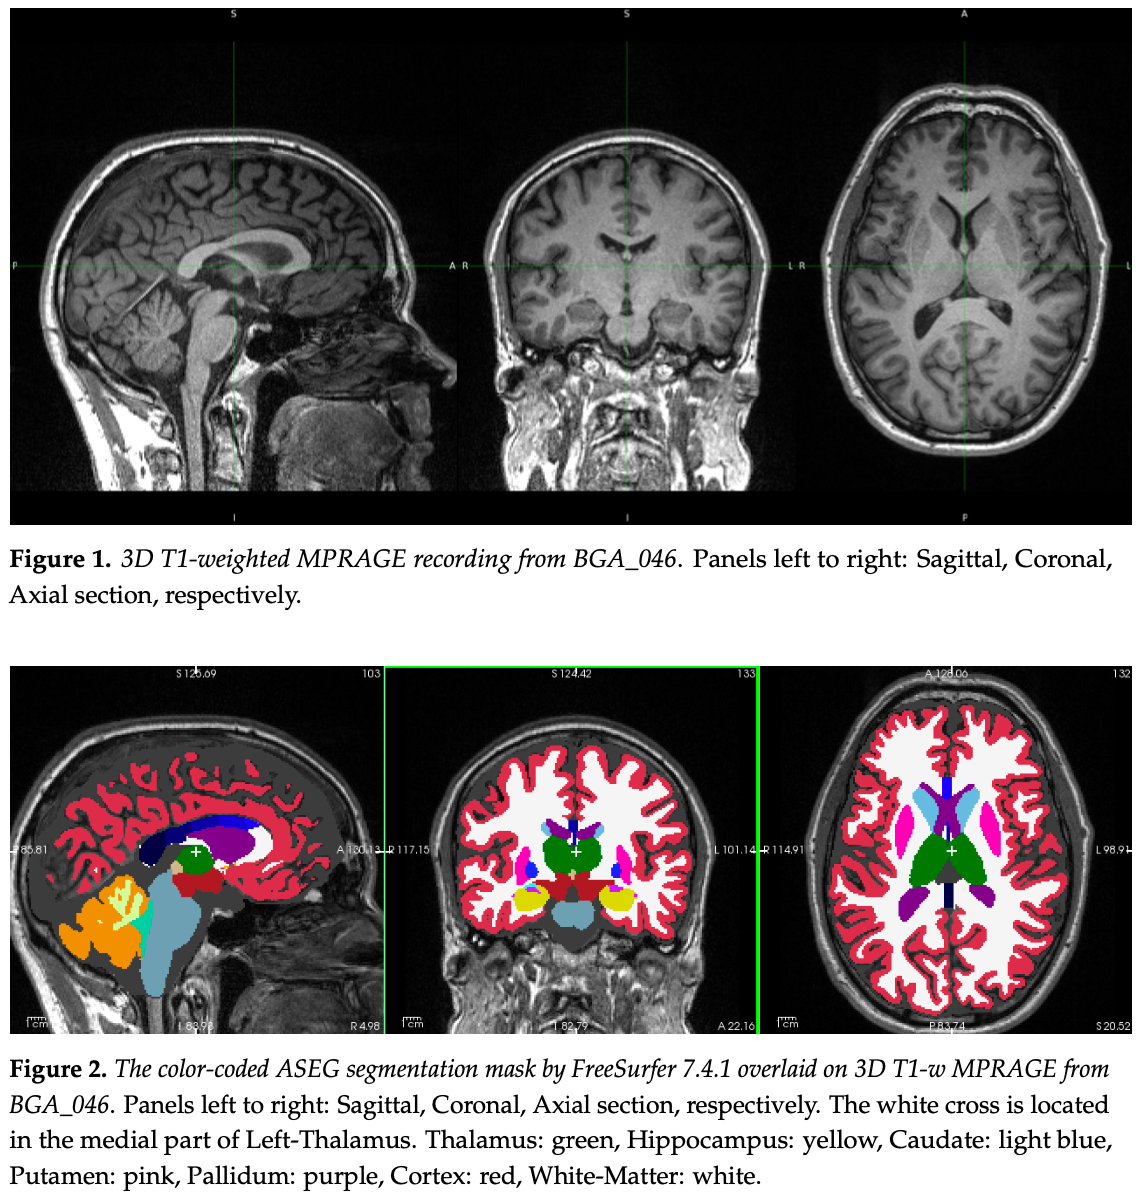

In [15]:
curr_dir = f"{os.path.expanduser('~')}/GitHub/ibs-brain/notebooks"
os.chdir(curr_dir)

from IPython.display import Image, display
display(Image(filename='../assets/Fig1_Fig2.png', width=800))

In [16]:
def launch_freeview(fshome, exam, home):
    """
    Launch freeview with the specified parameters and environment setup.
    
    Args:
        fshome (str): Path to FreeSurfer home directory
        exam (str): Examination folder name (e.g., 'week-000-1')
        home (str): User's home directory
    """
    import os
    import subprocess
    
    # Store current directory
    original_dir = os.getcwd()
    
    # Set up environment variables
    env = os.environ.copy()
    env.update({
        'FREESURFER_HOME': fshome,
        'PATH': f"{fshome}/bin:{env.get('PATH', '')}",
        'SUBJECTS_DIR': f"{home}/GitHub/ibs-brain/data",
        'FSLDIR': '/usr/local/fsl'
    })
    env['PATH'] = f"{env['FSLDIR']}/bin:{env['PATH']}"
    
    # Source FreeSurfer's setup script
    setup_cmd = f"source {fshome}/SetUpFreeSurfer.sh"
    subprocess.run(setup_cmd, shell=True, executable='/bin/bash', env=env)
    
    # Source FSL's setup
    fsl_cmd = f". {env['FSLDIR']}/etc/fslconf/fsl.sh"
    subprocess.run(fsl_cmd, shell=True, executable='/bin/bash', env=env)
    
    # Change to SUBJECTS_DIR
    os.chdir(env['SUBJECTS_DIR'])
    
    # Construct freeview command
    cmd = [
        'freeview', '-v',
        f"{exam}/{exam}_native.nii.gz",
        f"{exam}/{exam}_aseg.nii.gz:colormap=lut:opacity=0.8",
        '-ras', '4.03', '22.15', '21.90'
    ]
    
    # Execute freeview without checking return code
    subprocess.run(cmd, env=env)  # Removed check=True
    
    # Return to original directory
    os.chdir(original_dir)

In [17]:
exam = 'BGA_046'

In [18]:
launch_freeview(fshome, exam, home)

2024-11-27 18:28:15.732 freeview[13584:624651] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-27 18:28:15.732 freeview[13584:624651] +[IMKInputSession subclass]: chose IMKInputSession_Modern
